**Общая информация**

**Срок сдачи:** 20 марта 2019, 06:00 <br\>
**Штраф за опоздание:** -1 балл после 06:00 20 марта, -2 балла после 06:00 27 марта, -3 балла после 06:00 3 апреля

При отправлении ДЗ указывайте фамилию в названии файла
Присылать ДЗ необходимо в виде ссылки на свой github репозиторий в slack @alkhamush

Необходимо в slack скинуть ссылку в личный чат @alkhamush
Пример ссылки:
https://github.com/stroykova/spheremailru/stroykova_hw1.ipynb 


Используйте данный Ipython Notebook при оформлении домашнего задания.

###### Задание 1 (2 баллов)
Реализовать KNN в классе MyKNeighborsClassifier (обязательное условие: точность не ниже sklearn реализации)
Разберитесь самостоятельно, какая мера расстояния используется в KNeighborsClassifier дефолтно и реализуйте свой алгоритм именно с этой мерой. Самостоятельно разберитесь, как считается score из KNeighborsClassifier и реализуйте аналог в своём классе. Score не должен уступать значению KNN из sklearn

###### Задание 2 (2 балла)
Добиться скорости работы на fit,  predict и predict_proba сравнимой со sklearn для iris и mnist
Для этого используем numpy

###### Задание 3 (2 балла)
Для iris найдите такой параметр n_neighbors, при котором выдаётся наилучший score. Нарисуйте график зависимости score от n_neighbors

###### Задание 4 (3 балла)
Добавить algorithm='kd_tree' в реализацию KNN (использовать KDTree из sklearn.neighbors). Значение n_neighbors нужно взять из задания 3. Добиться скорости работы на fit,  predict и predict_proba сравнимой со sklearn для iris и mnist
Для этого используем numpy. Score не должен уступать значению KNN из sklearn

###### Задание 5 (1 балла)
Описать для чего нужны следующие библиотеки/классы/функции (список будет ниже)

**Штрафные баллы:**

1. Невыполнение PEP8 -1 балл
2. Отсутствие фамилии в имени скрипта (скрипт должен называться по аналогии со stroykova_hw1.ipynb) -1 балл
3. Все строчки должны быть выполнены. Нужно, чтобы output команды можно было увидеть уже в git'е. В противном случае -1 балл
4. При оформлении ДЗ нужно пользоваться данным файлом в качестве шаблона. Не нужно удалять и видоизменять структуру кода и текст. В противном случае -1 балл


In [1]:
import numpy as np
import matplotlib.pyplot as plt

import seaborn as sns
from sklearn import datasets
from sklearn.base import ClassifierMixin
from sklearn.datasets import fetch_mldata
from sklearn.neighbors.base import NeighborsBase, KNeighborsMixin, SupervisedIntegerMixin 
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
%load_ext pycodestyle_magic

In [2]:
#%%pycodestyle

from scipy import stats
from sklearn.neighbors import KDTree
from scipy.spatial import distance_matrix


class MyKNeighborsClassifier(NeighborsBase, KNeighborsMixin,
                             SupervisedIntegerMixin, ClassifierMixin):

    def __init__(self, n_neighbors, algorithm='brute'):
        self.n_neighbors = n_neighbors
        self.algorithm = algorithm

    def fit(self, X, y):
        self.X_fit = X
        self.y_fit = y

        self.classes = np.unique(y)
        self.n_of_classes = len(self.classes)

        if self.algorithm == 'kd_tree':
            self.kd_tree = KDTree(X)

        return self

    def predict(self, X):
        if self.algorithm == 'brute':
            return self.predict_brute(X)

        if self.algorithm == 'kd_tree':
            return self.predict_kd_tree(X)

    def predict_kd_tree(self, X):
        distances, indicies = self.kd_tree.query(X, k=self.n_neighbors)
        return stats.mode(np.asarray(self.y_fit[indicies]), axis=1)[0].T

    def predict_brute(self, X):
        distances = distance_matrix(self.X_fit, X)
        knn_classes = self.y_fit[distances.argsort(axis=0)][:self.n_neighbors]
        return stats.mode(knn_classes, axis=0)[0]

    def predict_proba(self, X):
        if self.algorithm == 'brute':
            return self.predict_proba_brute(X)
        if self.algorithm == 'kd_tree':
            return self.predict_proba_kd_tree(X)

    def predict_proba_kd_tree(self, X):
        distances, indicies = self.kd_tree.query(X, k=self.n_neighbors)
        knn_classes = self.y_fit[indicies]
        counts = np.empty((X.shape[0], 0))

        for cls in self.classes:
            probs = np.mean(knn_classes == cls, axis=1).reshape(X.shape[0], 1)
            counts = np.append(counts, probs, axis=1)

        return counts

    def predict_proba_brute(self, X):
        distances = distance_matrix(self.X_fit, X)
        knn_classes = self.y_fit[distances.argsort(axis=0)][:self.n_neighbors]
        counts = np.empty((X.shape[0], 0))

        for cls in self.classes:
            probs = np.mean(knn_classes == cls, axis=0).reshape(X.shape[0], 1)
            counts = np.append(counts, probs, axis=1)

        return counts

    """
    Я конечно написал функцию, но в пямяти не помещается, эх
    def distance(self, x, y):
        return np.sum(np.abs(y[np.newaxis,:,:]-x[:,np.newaxis,:])**2, axis=-1)
    """
    
    def score(self, X, y):
        y_pred = self.predict(X)
        return np.mean(y_pred == y)

**IRIS**

In [53]:
iris = datasets.load_iris()

In [54]:
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.1, stratify=iris.target)

In [55]:
clf = KNeighborsClassifier(n_neighbors=2)
my_clf = MyKNeighborsClassifier(n_neighbors=2)

In [56]:
%time clf.fit(X_train, y_train)

CPU times: user 1.12 ms, sys: 1.69 ms, total: 2.81 ms
Wall time: 2.51 ms


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=2, p=2,
           weights='uniform')

In [57]:
%time my_clf.fit(X_train, y_train)

CPU times: user 182 µs, sys: 120 µs, total: 302 µs
Wall time: 266 µs


MyKNeighborsClassifier(algorithm='brute', n_neighbors=2)

In [58]:
%time clf.predict(X_test)

CPU times: user 3 ms, sys: 3.71 ms, total: 6.7 ms
Wall time: 6.73 ms


array([2, 0, 1, 2, 1, 2, 0, 1, 0, 2, 0, 0, 1, 1, 1])

In [59]:
%time my_clf.predict(X_test)

CPU times: user 2.23 ms, sys: 2.19 ms, total: 4.43 ms
Wall time: 3.38 ms


array([[2, 0, 1, 2, 1, 2, 0, 1, 0, 2, 0, 0, 1, 1, 1]])

In [60]:
%time clf.predict_proba(X_test)

CPU times: user 1.3 ms, sys: 1.06 ms, total: 2.36 ms
Wall time: 2.2 ms


array([[0., 0., 1.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.]])

In [61]:
%time my_clf.predict_proba(X_test)

CPU times: user 1.02 ms, sys: 1.05 ms, total: 2.07 ms
Wall time: 1.65 ms


array([[0., 0., 1.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.]])

In [62]:
clf.score(X_test, y_test)

0.9333333333333333

In [63]:
my_clf.score(X_test, y_test)

0.9333333333333333

Задание 3

In [64]:
max_neighbors = 150
n_tests = 500

n_neighbors = np.arange(1,max_neighbors)
score = np.zeros(max_neighbors-1)

for n in n_neighbors:
    scores = []
    for test in range(n_tests):
        X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.1, stratify=iris.target)
        my_clf = MyKNeighborsClassifier(n_neighbors=n,algorithm='brute')
        my_clf.fit(X_train, y_train)
        scores.append(my_clf.score(X_test, y_test))
    score[n-1] = np.mean(scores)

Text(0.5, 1.0, 'Finding the best number of neighbors')

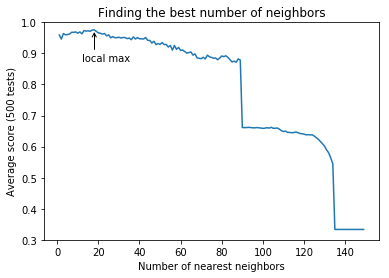

In [65]:
fig = plt.figure()
axes = fig.add_subplot(111)
axes.plot(n_neighbors,score)

xpos = score.argmax()
xmax = n_neighbors[xpos]
ymax = score.max()

axes.annotate('local max', xy=(xmax, ymax), xytext=(xmax-6, ymax-0.1),
            arrowprops=dict(arrowstyle="->",connectionstyle="angle,angleA=0,angleB=90")
            )
axes.set_ylim(0.3,1)
axes.set_ylabel('Average score ('+str(n_tests)+' tests)')
axes.set_xlabel('Number of nearest neighbors')
axes.set_title('Finding the best number of neighbors')

In [66]:
print('The best number of neighbors is '+str(xmax))

The best number of neighbors is 18


**MNIST**

In [13]:
from sklearn.datasets import fetch_openml

mnist = fetch_openml('mnist_784')
X_train, X_test, y_train, y_test = train_test_split(mnist.data, mnist.target, test_size=0.01, stratify=mnist.target)

In [44]:
clf = KNeighborsClassifier(n_neighbors=2)
my_clf = MyKNeighborsClassifier(n_neighbors=2)

In [45]:
%time clf.fit(X_train, y_train)

CPU times: user 27.5 s, sys: 452 ms, total: 28 s
Wall time: 28.8 s


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=2, p=2,
           weights='uniform')

In [46]:
%time my_clf.fit(X_train, y_train)

CPU times: user 2.28 ms, sys: 1.1 ms, total: 3.37 ms
Wall time: 2.32 ms


MyKNeighborsClassifier(algorithm='brute', n_neighbors=2)

In [47]:
%time clf.predict(X_test)

CPU times: user 58.4 s, sys: 213 ms, total: 58.6 s
Wall time: 59.3 s


array([1, 7, 4, 0, 4, 9, 4, 3, 8, 0, 4, 1, 1, 9, 9, 8, 4, 6, 1, 8, 9, 1,
       2, 7, 3, 3, 8, 2, 6, 9, 5, 6, 6, 7, 8, 2, 9, 9, 8, 8, 8, 0, 5, 2,
       6, 1, 4, 6, 1, 9, 3, 0, 6, 2, 8, 4, 4, 3, 5, 1, 0, 0, 7, 8, 4, 3,
       4, 1, 2, 0, 5, 3, 7, 9, 3, 0, 7, 8, 3, 6, 1, 7, 1, 1, 8, 2, 0, 2,
       4, 1, 8, 3, 1, 1, 7, 1, 8, 4, 5, 4, 5, 3, 0, 5, 3, 1, 5, 7, 9, 2,
       7, 5, 0, 5, 1, 1, 6, 6, 1, 8, 9, 0, 9, 0, 6, 2, 4, 3, 6, 0, 5, 2,
       4, 3, 1, 8, 0, 1, 7, 3, 5, 9, 2, 4, 7, 4, 0, 1, 3, 6, 4, 0, 3, 5,
       6, 5, 5, 0, 3, 7, 9, 2, 5, 1, 0, 2, 4, 9, 7, 4, 0, 3, 7, 3, 0, 5,
       9, 3, 8, 9, 8, 1, 3, 9, 4, 8, 3, 2, 4, 1, 8, 8, 9, 0, 0, 5, 5, 7,
       7, 0, 6, 5, 5, 5, 7, 2, 7, 9, 1, 2, 7, 2, 2, 5, 3, 5, 6, 3, 4, 8,
       1, 3, 8, 3, 1, 0, 0, 9, 7, 1, 6, 0, 6, 4, 3, 2, 6, 5, 9, 1, 7, 6,
       7, 6, 0, 1, 6, 0, 7, 3, 7, 2, 4, 4, 4, 5, 3, 6, 3, 6, 6, 0, 9, 1,
       7, 7, 7, 7, 1, 5, 2, 1, 2, 2, 9, 0, 0, 7, 0, 0, 3, 8, 7, 7, 2, 3,
       0, 0, 7, 3, 4, 5, 8, 3, 4, 5, 0, 0, 0, 6, 2,

In [48]:
%time my_clf.predict(X_test)

CPU times: user 7min 33s, sys: 3min 59s, total: 11min 32s
Wall time: 6min 32s


array([[1, 7, 4, 0, 4, 9, 4, 3, 8, 0, 4, 1, 1, 9, 9, 8, 4, 6, 1, 8, 9, 1,
        2, 7, 3, 3, 8, 2, 6, 9, 5, 6, 6, 7, 8, 2, 9, 9, 8, 8, 8, 0, 5, 2,
        6, 1, 4, 6, 1, 9, 3, 0, 6, 2, 8, 4, 4, 3, 5, 1, 0, 0, 7, 8, 4, 3,
        4, 1, 2, 0, 5, 3, 7, 9, 3, 0, 7, 8, 3, 6, 1, 7, 1, 1, 8, 2, 0, 2,
        4, 1, 8, 3, 1, 1, 7, 1, 8, 4, 5, 4, 5, 3, 0, 5, 3, 1, 5, 7, 9, 2,
        7, 5, 0, 5, 1, 1, 6, 6, 1, 8, 9, 0, 9, 0, 6, 2, 4, 3, 6, 0, 5, 2,
        4, 3, 1, 8, 0, 1, 7, 3, 5, 9, 2, 4, 7, 4, 0, 1, 3, 6, 4, 0, 3, 5,
        6, 5, 5, 0, 3, 7, 9, 2, 5, 1, 0, 2, 4, 9, 7, 4, 0, 3, 7, 3, 0, 5,
        9, 3, 8, 9, 8, 1, 3, 9, 4, 8, 3, 2, 4, 1, 8, 8, 9, 0, 0, 5, 5, 7,
        7, 0, 6, 5, 5, 5, 7, 2, 7, 9, 1, 2, 7, 2, 2, 5, 3, 5, 6, 3, 4, 8,
        1, 3, 8, 3, 1, 0, 0, 9, 7, 1, 6, 0, 6, 4, 3, 2, 6, 5, 9, 1, 7, 6,
        7, 6, 0, 1, 6, 0, 7, 3, 7, 2, 4, 4, 4, 5, 3, 6, 3, 6, 6, 0, 9, 1,
        7, 7, 7, 7, 1, 5, 2, 1, 2, 2, 9, 0, 0, 7, 0, 0, 3, 8, 7, 7, 2, 3,
        0, 0, 7, 3, 4, 5, 8, 3, 4, 5, 

In [49]:
%time clf.predict_proba(X_test)

CPU times: user 58.5 s, sys: 237 ms, total: 58.7 s
Wall time: 59.4 s


array([[0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.]])

In [50]:
%time my_clf.predict_proba(X_test)

CPU times: user 7min 31s, sys: 3min 55s, total: 11min 26s
Wall time: 6min 25s


array([[0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.]])

In [51]:
clf.score(X_test, y_test)

0.9714285714285714

In [52]:
my_clf.score(X_test, y_test)

0.9714285714285714

Задание 4

In [14]:
clf = KNeighborsClassifier(n_neighbors=2, algorithm='kd_tree')
my_clf = MyKNeighborsClassifier(n_neighbors=2, algorithm='kd_tree')

In [15]:
X_train, X_test, y_train, y_test = train_test_split(mnist.data, mnist.target, test_size=0.01, stratify=mnist.target)

In [35]:
X_train=X_train.astype(float)
X_test=X_test.astype(float)
y_train=y_train.astype(int)
y_test=y_test.astype(int)

In [36]:
%time clf.fit(X_train, y_train)

CPU times: user 23.8 s, sys: 224 ms, total: 24.1 s
Wall time: 24.5 s


KNeighborsClassifier(algorithm='kd_tree', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=2, p=2,
           weights='uniform')

In [37]:
%time my_clf.fit(X_train, y_train)

CPU times: user 26.6 s, sys: 421 ms, total: 27 s
Wall time: 28.2 s


MyKNeighborsClassifier(algorithm='kd_tree', n_neighbors=2)

In [38]:
%time clf.predict(X_test)

CPU times: user 58.7 s, sys: 247 ms, total: 59 s
Wall time: 59.5 s


array([1, 7, 4, 0, 4, 9, 4, 3, 8, 0, 4, 1, 1, 9, 9, 8, 4, 6, 1, 8, 9, 1,
       2, 7, 3, 3, 8, 2, 6, 9, 5, 6, 6, 7, 8, 2, 9, 9, 8, 8, 8, 0, 5, 2,
       6, 1, 4, 6, 1, 9, 3, 0, 6, 2, 8, 4, 4, 3, 5, 1, 0, 0, 7, 8, 4, 3,
       4, 1, 2, 0, 5, 3, 7, 9, 3, 0, 7, 8, 3, 6, 1, 7, 1, 1, 8, 2, 0, 2,
       4, 1, 8, 3, 1, 1, 7, 1, 8, 4, 5, 4, 5, 3, 0, 5, 3, 1, 5, 7, 9, 2,
       7, 5, 0, 5, 1, 1, 6, 6, 1, 8, 9, 0, 9, 0, 6, 2, 4, 3, 6, 0, 5, 2,
       4, 3, 1, 8, 0, 1, 7, 3, 5, 9, 2, 4, 7, 4, 0, 1, 3, 6, 4, 0, 3, 5,
       6, 5, 5, 0, 3, 7, 9, 2, 5, 1, 0, 2, 4, 9, 7, 4, 0, 3, 7, 3, 0, 5,
       9, 3, 8, 9, 8, 1, 3, 9, 4, 8, 3, 2, 4, 1, 8, 8, 9, 0, 0, 5, 5, 7,
       7, 0, 6, 5, 5, 5, 7, 2, 7, 9, 1, 2, 7, 2, 2, 5, 3, 5, 6, 3, 4, 8,
       1, 3, 8, 3, 1, 0, 0, 9, 7, 1, 6, 0, 6, 4, 3, 2, 6, 5, 9, 1, 7, 6,
       7, 6, 0, 1, 6, 0, 7, 3, 7, 2, 4, 4, 4, 5, 3, 6, 3, 6, 6, 0, 9, 1,
       7, 7, 7, 7, 1, 5, 2, 1, 2, 2, 9, 0, 0, 7, 0, 0, 3, 8, 7, 7, 2, 3,
       0, 0, 7, 3, 4, 5, 8, 3, 4, 5, 0, 0, 0, 6, 2,

In [39]:
%time my_clf.predict(X_test)

CPU times: user 51 s, sys: 200 ms, total: 51.2 s
Wall time: 51.6 s


array([[1, 7, 4, 0, 4, 9, 4, 3, 8, 0, 4, 1, 1, 9, 9, 8, 4, 6, 1, 8, 9, 1,
        2, 7, 3, 3, 8, 2, 6, 9, 5, 6, 6, 7, 8, 2, 9, 9, 8, 8, 8, 0, 5, 2,
        6, 1, 4, 6, 1, 9, 3, 0, 6, 2, 8, 4, 4, 3, 5, 1, 0, 0, 7, 8, 4, 3,
        4, 1, 2, 0, 5, 3, 7, 9, 3, 0, 7, 8, 3, 6, 1, 7, 1, 1, 8, 2, 0, 2,
        4, 1, 8, 3, 1, 1, 7, 1, 8, 4, 5, 4, 5, 3, 0, 5, 3, 1, 5, 7, 9, 2,
        7, 5, 0, 5, 1, 1, 6, 6, 1, 8, 9, 0, 9, 0, 6, 2, 4, 3, 6, 0, 5, 2,
        4, 3, 1, 8, 0, 1, 7, 3, 5, 9, 2, 4, 7, 4, 0, 1, 3, 6, 4, 0, 3, 5,
        6, 5, 5, 0, 3, 7, 9, 2, 5, 1, 0, 2, 4, 9, 7, 4, 0, 3, 7, 3, 0, 5,
        9, 3, 8, 9, 8, 1, 3, 9, 4, 8, 3, 2, 4, 1, 8, 8, 9, 0, 0, 5, 5, 7,
        7, 0, 6, 5, 5, 5, 7, 2, 7, 9, 1, 2, 7, 2, 2, 5, 3, 5, 6, 3, 4, 8,
        1, 3, 8, 3, 1, 0, 0, 9, 7, 1, 6, 0, 6, 4, 3, 2, 6, 5, 9, 1, 7, 6,
        7, 6, 0, 1, 6, 0, 7, 3, 7, 2, 4, 4, 4, 5, 3, 6, 3, 6, 6, 0, 9, 1,
        7, 7, 7, 7, 1, 5, 2, 1, 2, 2, 9, 0, 0, 7, 0, 0, 3, 8, 7, 7, 2, 3,
        0, 0, 7, 3, 4, 5, 8, 3, 4, 5, 

In [40]:
%time clf.predict_proba(X_test)

CPU times: user 58.8 s, sys: 222 ms, total: 59 s
Wall time: 59.4 s


array([[0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.]])

In [41]:
%time my_clf.predict_proba(X_test)

CPU times: user 50.2 s, sys: 103 ms, total: 50.3 s
Wall time: 50.5 s


array([[0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.]])

In [42]:
clf.score(X_test, y_test)

0.9714285714285714

In [43]:
my_clf.score(X_test, y_test)

0.9714285714285714

Задание 5

In [ ]:
# seaborn — библиотека использующая matplotlib для болле удобного построения графиков
# matplotlib — библиотека для построения графиков
# train_test_split — разделяет выборку на тестовую и обучеющую
# Pipeline (from sklearn.pipeline import Pipeline) —
#    дает единый интерфейс для набора преобразований, обучения модели и оценки результата
# StandardScaler (from sklearn.preprocessing import StandardScaler)
#    — преобразование к стандартному нормальному распределению
# ClassifierMixin — базовый класс для классификаторов
# NeighborsBase — базовый класс для ближайших соседей
# KNeighborsMixin — базовый класс для ближайших соседей с KNN
# SupervisedIntegerMixin — класс с методом fit, но осуществляет только 
#    проверку типов и вызывает _fit из NeighborsBase